In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
%matplotlib inline

In [2]:

train = pd.read_csv("Bikeshare_train.csv")
test = pd.read_csv("Bikeshare_test.csv")

In [3]:
train.describe()

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,165.000000,2.561934,6.640483,0.033233,2.854985,0.670695,1.389728,17.018127,19.543807,63.385776,0.190833,4598.447130
std,95.695698,1.094726,3.353974,0.179515,2.048680,0.470672,0.546962,11.192515,9.930991,14.334789,0.078240,1935.319338
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,25.416700,0.022392,431.000000
25%,82.500000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.500000,11.000000,52.702900,0.133083,3370.000000
50%,165.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,18.000000,21.000000,63.291700,0.178479,4648.000000
75%,247.500000,4.000000,9.500000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.500000,0.235380,5981.000000
max,330.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,38.000000,39.000000,97.250000,0.421642,8714.000000


In [4]:
test.describe()

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,199.500000,2.442500,6.420000,0.02500,3.115000,0.695000,1.400000,15.577500,18.340000,62.295911,0.190199,4514.21250
std,115.614301,1.122427,3.531966,0.15632,1.962499,0.460984,0.543819,11.777979,10.538598,14.165383,0.076975,2092.60635
min,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,-9.000000,-4.000000,0.000000,0.045404,22.00000
25%,99.750000,1.000000,3.000000,0.00000,2.000000,0.000000,1.000000,5.000000,9.000000,50.774450,0.134957,2875.25000
50%,199.500000,2.000000,6.000000,0.00000,3.000000,1.000000,1.000000,15.000000,18.000000,62.062500,0.183144,4516.00000
75%,299.250000,3.000000,10.000000,0.00000,5.000000,1.000000,2.000000,26.000000,28.000000,72.927100,0.232680,6174.75000
max,399.000000,4.000000,12.000000,1.00000,6.000000,1.000000,3.000000,39.000000,42.000000,94.958300,0.507463,10045.00000


(array([111.,  45.,  41.,  41.,  93.]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <a list of 5 Patch objects>)

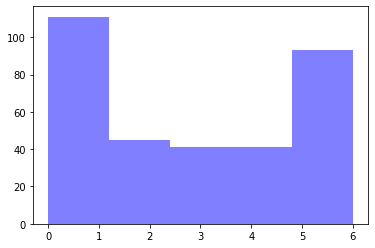

In [5]:
plt.hist(train['day_of_week'], 5, facecolor='blue', alpha=0.5)

In [6]:

train.rename(index=str, columns={"count": "rentals"}, inplace=True) 
test.rename(index=str, columns={"count": "rentals"}, inplace=True)

In [7]:
train.head(5)
pd.set_option('display.max_rows', 500)

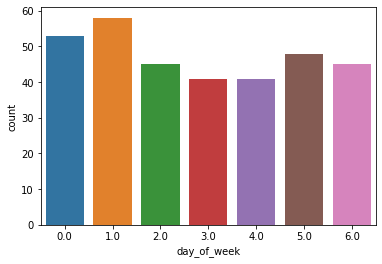

In [8]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='day_of_week',data=train)

[109, 222]


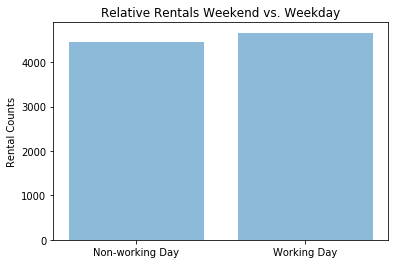

In [9]:


avg = [0, 0]

objects = ('0', '1')

y_pos = np.arange(len(objects))



day = [train.loc[train['workingday'] == 0, 'rentals'].sum()]

day.append(train.loc[train['workingday'] == 1,'rentals'].sum())


number_of_entries = list(pd.value_counts(train['workingday'].values, sort=False))
number_of_entries = list(reversed(number_of_entries))

freq = train['workingday'].value_counts()

print(number_of_entries)

avg[0] = day[0]/freq[0]

avg[1] = day[1]/freq[1]

plt.bar(y_pos, avg, align='center', alpha=0.5) 
plt.xticks(y_pos, ['Non-working Day', 'Working Day']) 
plt.ylabel('Rental Counts') 
plt.title('Relative Rentals Weekend vs. Weekday') 
plt.show()

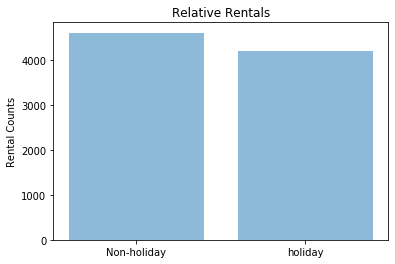

In [10]:


avg1 = [0, 0]

objects = ('0', '1')

y_pos = np.arange(len(objects))

#check for the non-working day and sum of bike rentals on working day same for working day

day1 = [train.loc[train['holiday'] == 0, 'rentals'].sum()]

day1.append(train.loc[train['holiday'] == 1,'rentals'].sum())


# number_of_entries = list(pd.value_counts(train['workingday'].values, sort=False))
# number_of_entries = list(reversed(number_of_entries))

freq1 = train['holiday'].value_counts()

# print(number_of_entries)

avg1[0] = day1[0]/freq1[0]

avg1[1] = day1[1]/freq1[1]

plt.bar(y_pos, avg1, align='center', alpha=0.5) 
plt.xticks(y_pos, ['Non-holiday', 'holiday']) 
plt.ylabel('Rental Counts') 
plt.title('Relative Rentals') 
plt.show()

From the above plot we can infer that bike rentals are lesser on holidays

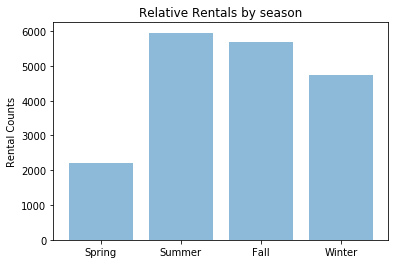

In [11]:


avg2 = [0, 0, 0, 0]

objects = ('1', '2', '3', '4')

y_pos = np.arange(len(objects))

#check for the non-working day and sum of bike rentals on working day same for working day

day2 = [train.loc[train['season'] == 1, 'rentals'].sum()]

day2.append(train.loc[train['season'] == 2,'rentals'].sum())

day2.append(train.loc[train['season'] == 3,'rentals'].sum())

day2.append(train.loc[train['season'] == 4,'rentals'].sum())

freq2 = train['season'].value_counts()

avg2[0] = day2[0]/freq2.iat[1]

avg2[1] = day2[1]/freq2.iat[3]
avg2[2] = day2[2]/freq2.iat[0]
avg2[3] = day2[3]/freq2.iat[2]


plt.bar(y_pos, avg2, align='center', alpha=0.5) 
plt.xticks(y_pos, ['Spring', 'Summer', 'Fall', 'Winter']) 
plt.ylabel('Rental Counts') 
plt.title('Relative Rentals by season') 
plt.show()

In [12]:

Xtrain, ytrain = train.drop('rentals', axis =1), train['rentals'].values.reshape(-1,1)
Xtest, ytest = test.drop('rentals', axis =1), test['rentals'].values.reshape(-1, 1)


mult_reg = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()

ytest_pred = mult_reg.predict(sm.add_constant(Xtest))
ytrain_pred = mult_reg.predict(sm.add_constant(Xtrain))

/home/navin106/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
print(mult_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     29.22
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           4.13e-42
Time:                        00:48:16   Log-Likelihood:                -2858.8
No. Observations:                 331   AIC:                             5742.
Df Residuals:                     319   BIC:                             5787.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4309.1335    582.240      7.401      

## Part (c): Checking Collinearity

Does the data suffer from multi-collinearity? To answer this question, let us first analyze the correlation matrix for the data. Compute the (Pearson product-moment) correlation matrix for the predictor variables in the training set, and visualize the matrix using a heatmap. For categorical attributes, you should use each binary predictor resulting from one-hot encoding to compute their correlations.  Are there predictors that fall into natural groups based on the correlation values? 

*Hint:* You may use the `np.corrcoef` function to compute the correlation matrix for a data set (do not forget to transpose the data matrix). You may use `plt.pcolor` function to visualize the correlation matrix.

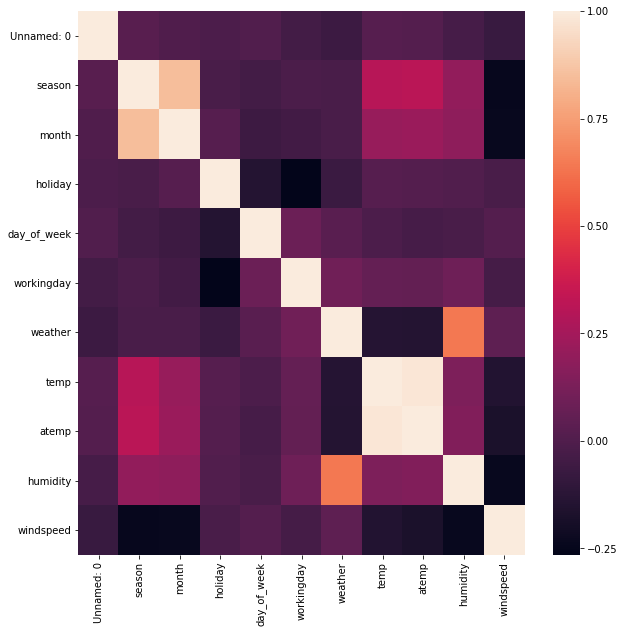

In [14]:
# your code here
corr = train.drop('rentals', axis = 1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr)

temp and atemp has multi-collinearity season and months also exhibit mulit-collinearity.

## Part (d): Subset Selection

Apply either one of the following subset selection methods discussed in class to choose a minimal subset of predictors that are related to the response variable:
- Step-wise forward selection
- Step-wise backward selection

We require you to implement both these methods *from scratch*. You may use the Bayesian Information Criterion (BIC) to choose the subset size in each method. Do these methods eliminate one or more of the redundant predictors (if any) identified in Part (c)? In each case, fit linear regression models using the identified subset of predictors to the training set. How do the test $R^2$ scores for the fitted models compare with the model fitted in Part (b) using all predictors?




In [15]:
# your code here
p_values = mult_reg.summary2().tables[1]['P>|t|']
p_values= p_values.sort_values()

print(p_values)

const          1.209460e-12
humidity       3.735034e-04
season         7.729725e-04
windspeed      8.045734e-03
day_of_week    2.547329e-02
weather        3.783049e-02
atemp          1.566502e-01
temp           3.587683e-01
workingday     4.395865e-01
holiday        4.752083e-01
month          5.191054e-01
Unnamed: 0     7.991971e-01
Name: P>|t|, dtype: float64


From the above table, we can observe the significance of all the features which are very relevant to predict the bike rentals.
Some of the significant features are humidity, season, windspeed and day of the week.

## Part (e): Cross Validation

- Perform a 10-fold cross-validation procedure to select between the 3 competing models you have so far: the model with the best BIC from Step-wise forward selection, the model with the best BIC from Step-wise backward selection (if it is different), and the model with all possible predictors.  Report the average $R^2$ across all 10 validation sets for each model and compare the results.  Why do you think this is the case?
- Evaluate each of the 3 models on the provided left out test set by calculating $R^2$.  Do the results agree with the cross-validation?  Why or why not?

In [16]:
# your code here
train.head(5)

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,rentals
0,0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [17]:
# your code here
#x train contains all the values in data frame except the rentals
#same with the test
Xtrain, ytrain = train.drop(['rentals','holiday','workingday','temp','month'], axis =1), train['rentals'].values.reshape(-1,1)
Xtest, ytest = test.drop(['rentals','holiday','temp', 'workingday', 'month'], axis =1), test['rentals'].values.reshape(-1, 1)


#building a multiple linear regression we have to fit some constant and fit the model
mult_reg = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()

ytest_pred = mult_reg.predict(sm.add_constant(Xtest))
ytrain_pred = mult_reg.predict(sm.add_constant(Xtrain))

In [18]:
print(mult_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     45.67
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           1.01e-44
Time:                        00:48:18   Log-Likelihood:                -2860.3
No. Observations:                 331   AIC:                             5737.
Df Residuals:                     323   BIC:                             5767.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4131.8854    526.253      7.852      

From the summary we can come to a conclusion that temp, season, day_of_week, weather and humidity are most significant features in the data set.
So we can just consider these variables for our model prediction